In [169]:
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import numpy as np

In [170]:
#Input Variables

#Camera Position
camX = 0.0
camY = -5.0
camAngle = -90.0

#Robot Position
yaw = -40.0
targetYaw = 0.0
w = 10.0
l = 10.0

#Pyeye Outputs
bearing = -10.0
dist = 15.0

In [171]:
#Calculate Change in Cam position with YAW

#Current Posiiton (swerve coords)
x_cur = camX * m.cos(m.radians(yaw)) - camY * m.sin(m.radians(yaw))
y_cur = camY * m.cos(m.radians(yaw)) + camX * m.sin(m.radians(yaw))

#Final Position (swerve coords)
x_final = camX * m.cos(m.radians(targetYaw)) - camY * m.sin(m.radians(targetYaw))
y_final = camY * m.cos(m.radians(targetYaw)) + camX * m.sin(m.radians(targetYaw))

#Change in Position
dX = x_final - x_cur
dY = y_final - y_cur

In [172]:
#Calculate Final Heading

#Heading direct from pyeye
heading_init = bearing + yaw + camAngle
x_init = dist * m.cos(m.radians(heading_init))
y_init = dist * m.sin(m.radians(heading_init))

#Heading with correction
x_corr = x_init - dX
y_corr = y_init - dY
heading_final = m.degrees(m.atan2(y_corr , x_corr))
range_final = m.sqrt(x_corr**2 + y_corr**2)

In [173]:
#Calculate Points needed for Graph

#Wheel Positions Initial [0,1,3,2,0]
wx_init = np.array([l/2 * m.cos(m.radians(yaw)) + w/2 * m.sin(m.radians(yaw)), 
                   l/2 * m.cos(m.radians(yaw)) - w/2 * m.sin(m.radians(yaw)),
                  -l/2 * m.cos(m.radians(yaw)) - w/2 * m.sin(m.radians(yaw)),
                  -l/2 * m.cos(m.radians(yaw)) + w/2 * m.sin(m.radians(yaw)),
                   l/2 * m.cos(m.radians(yaw)) + w/2 * m.sin(m.radians(yaw))])
wy_init = np.array([-w/2 * m.cos(m.radians(yaw)) + l/2 * m.sin(m.radians(yaw)),
                    w/2 * m.cos(m.radians(yaw)) + l/2 * m.sin(m.radians(yaw)),
                    w/2 * m.cos(m.radians(yaw)) - l/2 * m.sin(m.radians(yaw)),
                   -w/2 * m.cos(m.radians(yaw)) - l/2 * m.sin(m.radians(yaw)),
                   -w/2 * m.cos(m.radians(yaw)) + l/2 * m.sin(m.radians(yaw))])

#Wheel Positions Final [0,1,3,2,0]
wx_final = wx_init * m.cos(m.radians(targetYaw - yaw)) - wy_init * m.sin(m.radians(targetYaw - yaw)) + x_corr
wy_final = wy_init * m.cos(m.radians(targetYaw - yaw)) + wx_init * m.sin(m.radians(targetYaw - yaw)) + y_corr

#Wheel Positions No Correction [0,1,3,2,0]
wx_final_2 = wx_init * m.cos(m.radians(targetYaw - yaw)) - wy_init * m.sin(m.radians(targetYaw - yaw)) + x_init
wy_final_2 = wy_init * m.cos(m.radians(targetYaw - yaw)) + wx_init * m.sin(m.radians(targetYaw - yaw)) + y_init

#Target Position
xcam = dist * m.cos(m.radians(bearing))
ycam = dist * m.sin(m.radians(bearing))
xrobot = xcam * m.cos(m.radians(camAngle)) - ycam * m.sin(m.radians(camAngle)) + camX
yrobot = ycam * m.cos(m.radians(camAngle)) + xcam * m.sin(m.radians(camAngle)) + camY
xswerve = xrobot * m.cos(m.radians(yaw)) - yrobot * m.sin(m.radians(yaw))
yswerve = yrobot * m.cos(m.radians(yaw)) + xrobot * m.sin(m.radians(yaw))


#Lines for Headings, start @ camera current position (x_cur, y_cur)

#With Heading correction - end point
cx_final = x_cur + x_corr
cy_final = y_cur + y_corr

#Without Heading correction - end point
cx_final_2 = x_cur + x_init
cy_final_2 = y_cur + y_init

Final Heading: -150.05
Final Range: 16.97


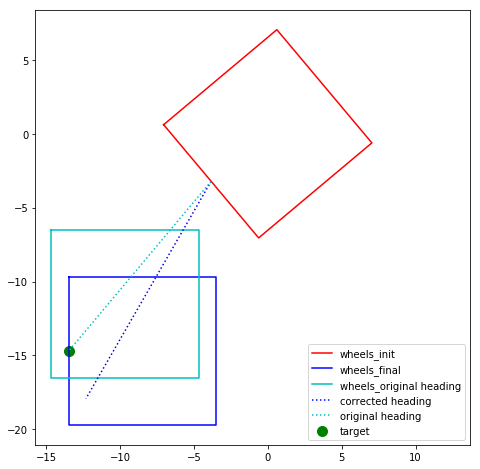

In [174]:
#Plot Results
plt.figure(figsize=(8,8))

#Wheels
plt.plot(wy_init, wx_init, 'r', label='wheels_init')
plt.plot(wy_final,wx_final, 'b', label='wheels_final')
plt.plot(wy_final_2, wx_final_2, 'c', label='wheels_original heading')

#Target
plt.scatter(yswerve, xswerve, color='g', s = 100, label='target')

#Headings
plt.plot([y_cur, cy_final], [x_cur, cx_final], 'b:', label='corrected heading')
plt.plot([y_cur, cy_final_2], [x_cur, cx_final_2], 'c:', label='original heading')

plt.legend()
plt.axis('square')

print(f'Final Heading: {heading_final:.2f}')
print(f'Final Range: {range_final:.2f}')